## 1. Data Spliting

In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
#The samples in test_csv will not be used for training & validation
train_csv=pd.read_csv('Data/train.csv')
train_csv.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
#The samples in test_csv will not be used during training
test_csv=pd.read_csv('Data/test.csv')
test_csv.head()

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [5]:
#Count every label_group
train_csv.label_group.value_counts().reset_index().rename(columns={'index':'label_group','label_group':'count'}).head()

,label_group,count
0,994676122,51
1,1163569239,51
2,1141798720,51
3,159351600,51
4,562358068,51


In [6]:
#Only sample those label_group which has more than 20 samples
test_ratio=0.1
label_count=train_csv.label_group.value_counts().reset_index().rename(columns={'index':'label_group','label_group':'count'})
sample_num={}

for i in range(label_count.shape[0]):
    num_to_sample=label_count['count'].iloc[i]*test_ratio
    if num_to_sample<2:continue
    sample_num[label_count['label_group'].iloc[i]]=int(num_to_sample)

sample_num

{994676122: 5,
 1163569239: 5,
 1141798720: 5,
 159351600: 5,
 562358068: 5,
 3113678103: 5,
 3627744656: 5,
 3206118280: 4,
 1733221456: 4,
 1166650192: 4,
 1091404026: 4,
 3489985175: 4,
 1237550763: 3,
 1746655739: 3,
 452508504: 3,
 731330024: 3,
 4184214313: 3,
 2008989859: 3,
 1575763518: 3,
 66247839: 3,
 871679006: 3,
 952183003: 3,
 2259957740: 3,
 3001123709: 3,
 2999794436: 3,
 2935813666: 3,
 3926100920: 3,
 656698835: 3,
 1226500780: 3,
 997220911: 3,
 1201602115: 2,
 821583868: 2,
 3717044186: 2,
 3868183614: 2,
 1135976474: 2,
 3326267479: 2,
 3040690230: 2,
 927285629: 2,
 1306578136: 2,
 2156459496: 2,
 4141124289: 2,
 2123332638: 2,
 418991059: 2,
 1569494229: 2,
 3441184770: 2,
 777596345: 2,
 1744240905: 2,
 2956941947: 2,
 1065450055: 2,
 1544174053: 2,
 1088754866: 2,
 2911646536: 2,
 4277487223: 2,
 3433277712: 2,
 962477933: 2,
 1285119273: 2,
 4038613836: 2,
 2748623227: 2}

In [7]:
valid_idx=[list(np.where(train_csv['label_group']==label)[0][:sample_num[label]]) for label in sample_num]
valid_idx=[idx for group in valid_idx for idx in group]

train_idx=[i for i in range(train_csv.shape[0]) if i not in valid_idx]

print('TrainingSet Size:{}'.format(len(train_idx)))
print('ValidationSet Size:{}'.format(len(valid_idx)))

TrainingSet Size:34085
ValidationSet Size:165


In [8]:
X_train,y_train=train_csv.iloc[train_idx,:-1],train_csv.iloc[train_idx,-1]
X_valid,y_valid=train_csv.iloc[valid_idx,:-1],train_csv.iloc[valid_idx,-1]

## 2. Data Cleaning

In [9]:
# Code Reference: https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76
import re
import nltk
import string
from nltk.corpus import stopwords
# # In case of any corpus are missing 
stop_words = stopwords.words("english")
def text_preproc(x):
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x

In [10]:
def clean_apply(docs):
    for i, doc in enumerate(docs):
        docs[i] = text_preproc(doc)

In [11]:
train_text = np.array(X_train['title'])

In [12]:
test_text = np.array(X_valid['title'])

In [13]:
clean_apply(train_text)

In [14]:
clean_apply(test_text)

In [18]:
train_text[:5]

array(['paper bag victoria secret',
       'double tape vhb mm x original double foam tape',
       'maling tts canned pork luncheon meat gr',
       'daster batik lengan pendek motif acak campur leher kancing batik karakter alhadi',
       'nescafe latte '], dtype=object)

In [17]:
test_text[:5]

array(['karet kucir premium', ' karet ikat rambut elastis untuk wanita',
       ' pcs ikat rambut karet polos elastis gaya korea untuk wanita',
       ' pcs ikat rambut korea karet polos elastis gaya korea untuk wanita',
       'korea women children hair tie head rope karet gelang elastis'],
      dtype=object)

#### Concatenation

In [20]:
train_data = np.c_[train_text,np.array(y_train)]
train_data.shape

(34085, 2)

In [21]:
test_data = np.c_[test_text,np.array(y_valid)]
test_data.shape

(165, 2)

In [23]:
train_data[:5,:]

array([['paper bag victoria secret', 249114794],
       ['double tape vhb mm x original double foam tape', 2937985045],
       ['maling tts canned pork luncheon meat gr', 2395904891],
       ['daster batik lengan pendek motif acak campur leher kancing batik karakter alhadi',
        4093212188],
       ['nescafe latte ', 3648931069]], dtype=object)

In [24]:
test_data[:5,:]

array([['karet kucir premium', 994676122],
       [' karet ikat rambut elastis untuk wanita', 994676122],
       [' pcs ikat rambut karet polos elastis gaya korea untuk wanita',
        994676122],
       [' pcs ikat rambut korea karet polos elastis gaya korea untuk wanita',
        994676122],
       ['korea women children hair tie head rope karet gelang elastis',
        994676122]], dtype=object)

## 3. Multi-Classification using LSTM models

#### Tokenizer and Padding

In [33]:
max_features = 10000
max_len = 500
all_text = np.concatenate((train_data[:,0], test_data[:,0]), axis=0)

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(all_text)
x_train = tokenizer.texts_to_sequences(train_data[:,0])
x_test = tokenizer.texts_to_sequences(test_data[:,0])

from keras.utils import pad_sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

#### One-hot-encoding labels

In [38]:
unique_label_numbers = len(train_csv.label_group.unique())
unique_label_numbers

11014

In [39]:
train_data[:,1]

array([249114794, 2937985045, 2395904891, ..., 4101248785, 1663538013,
       459464107], dtype=object)

In [41]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
one_hot_train_labels = label_encoder.fit_transform(train_data[:,1])
one_hot_test_labels = label_encoder.fit_transform(test_data[:,1])

In [42]:
one_hot_train_labels

array([  666,  7572,  6172, ..., 10537,  4242,  1163])

In [43]:
one_hot_test_labels 

array([13, 13, 13, 13, 13, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19,  1,  1,
        1,  1,  1,  4,  4,  4,  4,  4, 44, 44, 44, 44, 44, 50, 50, 50, 50,
       50, 45, 45, 45, 45, 30, 30, 30, 30, 21, 21, 21, 21, 17, 17, 17, 17,
       49, 49, 49, 49, 24, 24, 24, 32, 32, 32,  3,  3,  3,  6,  6,  6, 56,
       56, 56, 33, 33, 33, 29, 29, 29,  0,  0,  0,  9,  9,  9, 11, 11, 11,
       36, 36, 36, 42, 42, 42, 41, 41, 41, 39, 39, 39, 53, 53, 53,  5,  5,
        5, 23, 23, 23, 14, 14, 14, 22, 22,  8,  8, 51, 51, 52, 52, 18, 18,
       46, 46, 43, 43, 10, 10, 26, 26, 35, 35, 55, 55, 34, 34,  2,  2, 28,
       28, 48, 48,  7,  7, 31, 31, 40, 40, 15, 15, 27, 27, 16, 16, 38, 38,
       57, 57, 47, 47, 12, 12, 25, 25, 54, 54, 37, 37])

In [44]:
x_train.shape

(34085, 500)

In [45]:
x_test.shape

(165, 500)

In [46]:
one_hot_train_labels.shape

(34085,)

In [47]:
one_hot_test_labels.shape

(165,)

### Now data is ready for RNN model and needs to train an embedding layer with Keras as the first layer of your model 

### LSTM models

### Add Dropout layer and Embedding layer

In [72]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11014, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train[:6000], one_hot_train_labels[:6000], epochs=10, batch_size=1000, validation_data = (x_test, one_hot_test_labels))

Epoch 1/10
6/6 [==============================] - 23s 4s/step - loss: 9.3065 - accuracy: 5.0000e-04 - val_loss: 9.3083 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 21s 4s/step - loss: 9.2827 - accuracy: 0.0042 - val_loss: 9.3358 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 20s 3s/step - loss: 9.0796 - accuracy: 0.0020 - val_loss: 9.5021 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 8.7297 - accuracy: 0.0012 - val_loss: 9.9284 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 20s 3s/step - loss: 8.4739 - accuracy: 0.0020 - val_loss: 10.5700 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 20s 3s/step - loss: 8.3753 - accuracy: 0.0020 - val_loss: 11.1027 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 20s 3s/step - loss: 8.3430 - accuracy: 0.0017 - val_loss: 11.4656 - val_accuracy: 0.0000e+00

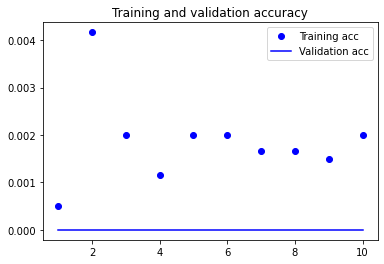

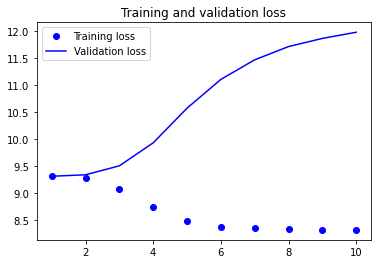

In [75]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
model.save('LSTM')

INFO:tensorflow:Assets written to: LSTM/assets


INFO:tensorflow:Assets written to: LSTM/assets
